# Customer Churn

#### Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from sklearn.metrics import accuracy_score

#### Loading Data

In [ ]:
customerData = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
customerData.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
customerData['NumOfProducts'].nunique()

4

In [ ]:
customerData.shape

(10000, 14)

In [ ]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# checking for missing data
customerData.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


#### Data Visualization

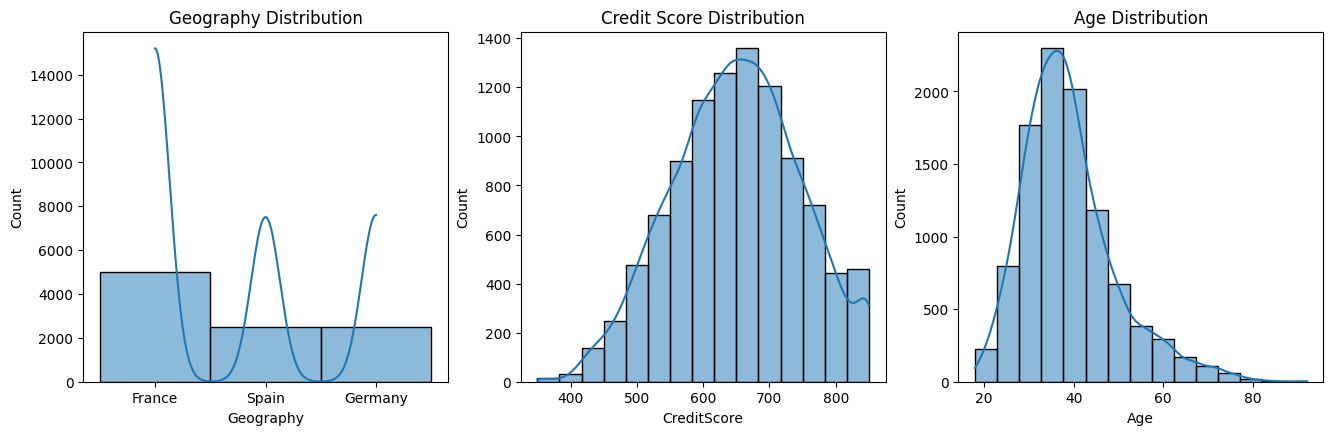

In [ ]:
plt.figure(figsize=(16, 10))

#Geography distribution
plt.subplot(2, 3, 1)
sns.histplot(customerData['Geography'], bins=15, kde=True)
plt.title('Geography Distribution')

#Credit Score distribution
plt.subplot(2, 3, 2)
sns.histplot(customerData['CreditScore'], bins=15, kde=True)
plt.title('Credit Score Distribution')

#Age distribution
plt.subplot(2, 3, 3)
sns.histplot(customerData['Age'], bins=15, kde=True)
plt.title('Age Distribution')

plt.show()

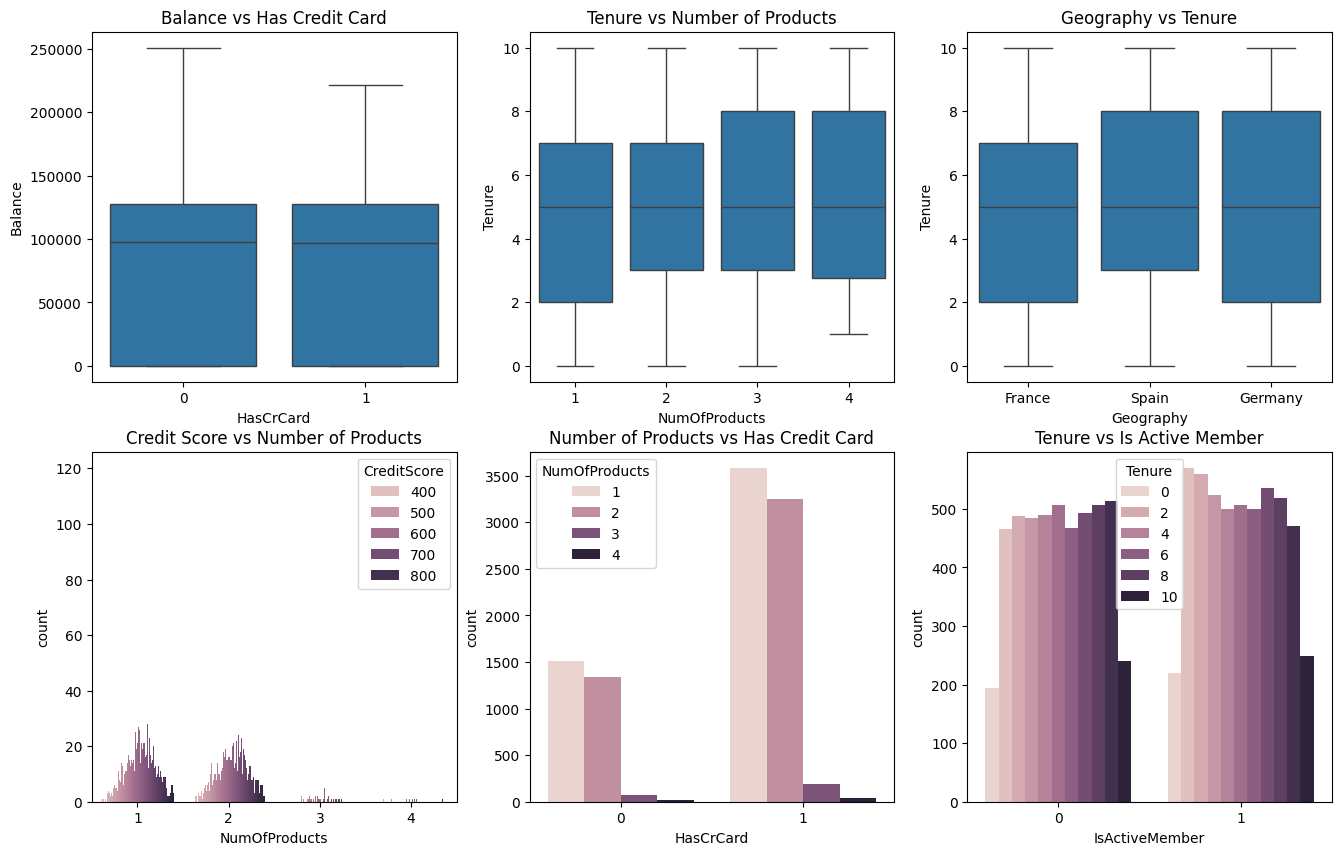

In [ ]:
plt.figure(figsize=(16, 10))

# Balance vs Has Credit Card
plt.subplot(2, 3, 1)
sns.boxplot(x='HasCrCard', y='Balance', data=customerData)
plt.title('Balance vs Has Credit Card')

# Tenure vs Number of Products
plt.subplot(2, 3, 2)
sns.boxplot(x='NumOfProducts', y='Tenure', data=customerData)
plt.title('Tenure vs Number of Products')

# Geography vs Tenure
plt.subplot(2, 3, 3)
sns.boxplot(x='Geography', y='Tenure', data=customerData)
plt.title('Geography vs Tenure')

# Credit Score vs Number of Products
plt.subplot(2, 3, 4)
sns.countplot(x='NumOfProducts', hue='CreditScore', data=customerData)
plt.title('Credit Score vs Number of Products')

# Number of Products vs Has Credit Card
plt.subplot(2, 3, 5)
sns.countplot(x='HasCrCard', hue='NumOfProducts', data=customerData)
plt.title('Number of Products vs Has Credit Card')

# Tenure vs Is Active Member
plt.subplot(2, 3, 6)
sns.countplot(x='IsActiveMember', hue='Tenure', data=customerData)
plt.title('Tenure vs Is Active Member')

plt.show()

In [ ]:
X = customerData.iloc[:, 3:-1].values
y = customerData.iloc[:, -1].values

In [ ]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
X.shape

(10000, 10)

In [ ]:
y.shape

(10000,)

#### Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

encoder = LabelEncoder()
X[:, 2] = encoder.fit_transform(X[:, 2])
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), [1])], remainder='passthrough')

X = ct.fit_transform(X)

#### Splitting the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 1.00150113, -0.57946723, -0.57638802, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.99850112,  1.72572313, -0.57638802, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.99850112, -0.57946723,  1.73494238, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 1.00150113, -0.57946723, -0.57638802, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 1.00150113, -0.57946723, -0.57638802, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [-0.99850112,  1.72572313, -0.57638802, ...,  0.64920267,
         0.97481699, -0.81456811]])

#### Building the Model

In [ ]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

#### Training the model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7491 - loss: 0.5642 - val_accuracy: 0.8119 - val_loss: 0.4466
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7916 - loss: 0.4831 - val_accuracy: 0.8150 - val_loss: 0.4262
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7979 - loss: 0.4626 - val_accuracy: 0.8294 - val_loss: 0.4217
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8097 - loss: 0.4476 - val_accuracy: 0.8338 - val_loss: 0.4062
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8179 - loss: 0.4287 - val_accuracy: 0.8406 - val_loss: 0.3936
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8130 - loss: 0.4287 - val_accuracy: 0.8500 - val_loss: 0.3828
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8263 - loss: 0.4221 - val_accuracy: 0.8562 - val_loss: 0.3750
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8361 - loss: 0.4133 - val_accu

#### Plotting History

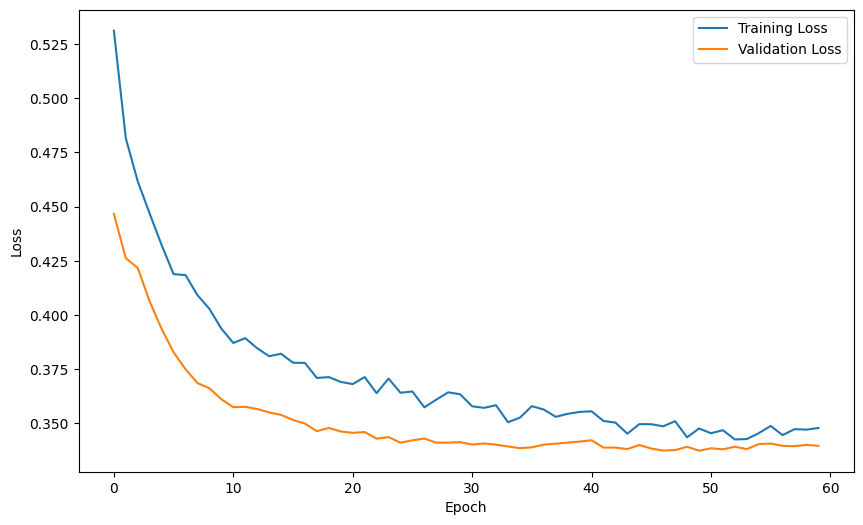

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

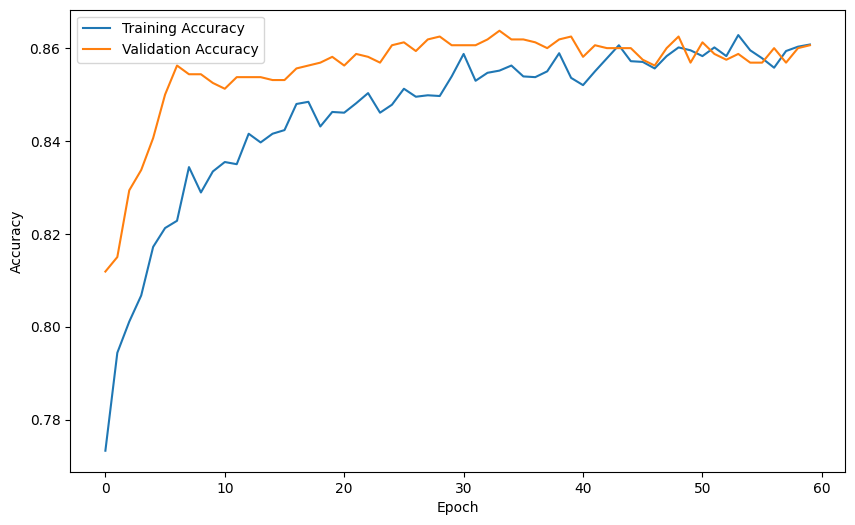

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#### Evaluate the Model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8562 - loss: 0.3337
Test Loss: 0.3371
Test Accuracy: 0.8590


In [ ]:
# Saving the model
model.save('customer_churn_model.h5')

# downloading
from google.colab import files
files.download('customer_churn_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>